<a href="https://colab.research.google.com/github/avach0/pso-project/blob/main/PSO_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install summarytools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=12cb4450ce242ef5898292a4ffdb4a4b63c6e8168cc2dc0e2ef381acf1151c83
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=0ad222cab4c49911e9703369900949b48a1ba37300e30369ed1f7d6611d25fae
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import yfinance as yf

In [ ]:
from summarytools import dfSummary

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Define the ticker symbol and date range
ticker_symbol = 'RELIANCE.NS'
start_date = '2016-01-01'
end_date = '2020-12-31'

In [ ]:
# Download data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from pyswarm import pso
import matplotlib.pyplot as plt

In [ ]:
df = data.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,500.158997,504.666260,499.366516,502.907928,481.838531,2499742
2016-01-04,497.781525,502.140198,488.717438,492.977081,472.323669,13923887
2016-01-05,495.453583,500.258057,493.819092,497.855835,476.998077,6897687
2016-01-06,499.069336,514.324707,495.503113,511.253815,489.834747,12349673
2016-01-07,505.731171,509.173553,499.292206,501.867798,480.841949,9109980
...,...,...,...,...,...,...
2020-12-23,1930.000000,1951.449951,1920.650024,1943.849976,1925.000610,8999898
2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,1974.813110,9588577
2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,1983.874390,7947719


In [ ]:
df = df.drop('Adj Close', axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01,500.158997,504.666260,499.366516,502.907928,2499742
2016-01-04,497.781525,502.140198,488.717438,492.977081,13923887
2016-01-05,495.453583,500.258057,493.819092,497.855835,6897687
2016-01-06,499.069336,514.324707,495.503113,511.253815,12349673
2016-01-07,505.731171,509.173553,499.292206,501.867798,9109980
...,...,...,...,...,...
2020-12-23,1930.000000,1951.449951,1920.650024,1943.849976,8999898
2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,9588577
2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,7947719


In [ ]:
df = df.round(2)
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01,500.16,504.67,499.37,502.91,2499742
2016-01-04,497.78,502.14,488.72,492.98,13923887
2016-01-05,495.45,500.26,493.82,497.86,6897687
2016-01-06,499.07,514.32,495.50,511.25,12349673
2016-01-07,505.73,509.17,499.29,501.87,9109980
...,...,...,...,...,...
2020-12-23,1930.00,1951.45,1920.65,1943.85,8999898
2020-12-24,1947.00,1998.80,1945.90,1994.15,9588577
2020-12-28,2006.70,2018.00,1995.30,2003.30,7947719


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,1065.132384,1077.712709,1051.621460,1064.063544,1.018746e+07
std,477.644142,483.611917,469.720672,476.075858,7.650437e+06
min,454.690000,462.570000,439.880000,449.020000,1.296168e+06
25%,648.850000,657.270000,642.140000,646.550000,5.678473e+06
50%,980.510000,996.550000,967.530000,986.700000,7.843781e+06
75%,1325.390000,1344.750000,1309.590000,1324.300000,1.171467e+07
max,2325.000000,2369.350000,2310.550000,2324.550000,6.584835e+07


In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Open[float64],Mean (sd) : 1065.1 (477.6)min < med < max:454.7 < 980.5 < 2325.0IQR (CV) : 676.5 (2.2),"1,121 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cPY7aQBiA4W/CsjIg2eJH0HGBlVIg0XCAlDlsjpCCIjU3oENCyAhnLYwhVVaKQgKe8aznY9+n3jEUr8x4PTPmcrkIELpPTX8B4B5Pt/7AGNMRkWfL6x8vl8ur5VjgzX9DNcZ0hsPh1ziO+zYX3+/3O2PMN2KFq1t31Oc4jvuLxeI1SZK8yoXTNI2Wy2V/u90+iwihwsnNn34RkSRJ8vF4/NPi+h2LMcBfeJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoV7tqK0pQmd8Cy+zYswYba5A5Ydt+GJ9hQpdkdsOy+DUzIoYpIsztg2X0bDh6moAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKwb/rt1WWZVtEYmOMzfD4fD63a/5KcPCQoWZZ1i6K4vN0Om21Wq1Kq59ERIqiiMqyfMnz/LuI2CxKQc28htrUXe14PD5FUdSdzWb5ZDLZVR2/Xq/7q9WqezqdWjafj/p5CzWEu1qv17Naprfb7VimFxhvoXJXQ528z1E/4l3NccrDfqsrHvJhqkmuUx72W11HqDVzmfKw3+rfCNUT2ymPsN/qKt5MQQVChQqEChUIFSoQKlQgVKjAv6fwxvEEQxGPb9UIFSLifoKhiN+3aoSK36xPMBTx/1aNUPEHhxMMRTy+VeNhCioQKlQgVKjAHBW18blgnFBRC98LxgkVtfC9YJxQH4zD26VaDt3wtWCcUAPjOM+LBoPBlyRJelUHhn7oBqEGpI6zEETkZT6f/xiNRvsqY0Pfnk6oAanrLIQoioqqP7+hb08n1AB9xLMQbrkr1DRNo6oXPhwOkYhIlmXRZrPpvud4rZ+t9Xu7jr+nr1/NOK6Rlu4UNgAAAABJRU5ErkJggg=="">",0(0.0%)
2,High[float64],Mean (sd) : 1077.7 (483.6)min < med < max:462.6 < 996.5 < 2369.3IQR (CV) : 687.5 (2.2),"1,163 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkUlEQVR4nO3cT27aQBSA8TclRAYkWwgJdlygUhcsOUQP2yN0wQm4ATskZBnhxsIYd5VIVUnBM556nvl+69hB0acM/jPP1HUtQOi+dP0BgEe83PsBY8xIRF4tz3+u6/rN8ljgwz9DNcaMZrPZ9ziOpzYnPx6PqTHmB7HC1b3/qK9xHE/X6/VbkiRFkxNnWRZtNpvp4XB4FRFChZO7S7+ISJIkxXw+/2Vx/pHFMcBfuJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUeGhzX1e6nCnAPIOwBBtqlzMFmGcQnmBDlW5nCjDPIDAhhyoi3c4UYJ5BOLiYggqEChUIFSoQKlQgVKhAqFCBUKECoUKF4G/426qqaigisTHG5vD4er0OW/5IcNDLUPM8H5Zl+W25XA4Gg0GjR6AiImVZRlVVfS2K4qeI2DyZQst6Ger5fH6Jomi8Wq2KxWKRNj1+t9tNt9vt+HK5DHx8PjTnNdSul9/JZGL1rD5NU57VB8ZbqCy/aJO3UJ95+XVcSXjp+gbv31Gfbfl1XUl46fq2Xl5MdcllJeGl688Rqie2K4nw0vVNPJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVu+OOD42A4EY/vKRAqRMR9MJyI3/cUCBXvrAfDifh/T4FQ8QeHwXAiHt9T4GIKKhAqVCBUqMB3VLTG5xYcQu0Zh3uhTrt+fW/BIdQecbkX6rrr1/cWHELtF+t7oW3t+vW1BYdQA9PG0I4kSdKmsYS+65dQA8LQjs8RakCeeWjHPQ+FmmVZ1PTEp9MpEhHJ8zza7/fj/3m81t/9fqwrbX+zR/r6DVsJrv8HaqbgAAAAAElFTkSuQmCC"">",0(0.0%)
3,Low[float64],Mean (sd) : 1051.6 (469.7)min < med < max:439.9 < 967.5 < 2310.6IQR (CV) : 667.4 (2.2),"1,159 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmElEQVR4nO3cT46iQBSA8VdDq/gnEGOiOy8wySxccog57ByhF57AG7gzMQYj3UREZjWdTMYZhaKGevb3WzfI4osNFq9MVVUC+O5L1xcAPOLl3h8YY4Yi0m94/nNVVe8NjwU+/DNUY8xwNpt9j6Jo2uTkx+PxYIz5Qaywde8btR9F0TRJkvc4jvM6J07TNFyv19P9ft8XEUKFlbv/+kVE4jjO5/P5W4PzDxscA/yBhymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjw0Bv+XelysJChRr94G2qXg4UMNfrH21Cl28FChho943OoItLtYCFDjf7gYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMH7l1KaKsuyJyKRMabJ4dH1eu21fEmw4DTUrmLJsqxXFMW35XIZBEFQ6zU9EZGiKMKyLL/mef4qIk3enkLLnIXaZSzn8/klDMPRarXKF4vFoe5nb7fb6WazGV0ul6DusXDDWag+xDIejxu9T3o4HHif1DPO71E/YyyWtzzMW93wtA9TXbG95WHe6jZCbZnNLQ/zVn9HqI40veUR5q1u4gd/qECoUIFQoQKhQgVChQqEChX4eQofLHcwFHG4qkaoEBH7HQxF3K6qESp+abyDoYj7VTVCxW8sdjAUcbiqxsMUVCBUqECoUIFQoQKhQgWe+tEalyM4hPpkLFaXrPYycD2CQ6hPxGZ1yXYvA9cjOITqGdtNOyaTyTxJkmPd1aW29jJwNYJDqB5pa9OOwWDwWjcW38fTCdUjPmza4StC9dBn3LTjnodCTdM0rHvi0+kUiohkWRbudrvR/zxe62drvW7b4x/p6yeVP7TH92YrYwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Close[float64],Mean (sd) : 1064.1 (476.1)min < med < max:449.0 < 986.7 < 2324.6IQR (CV) : 677.8 (2.2),"1,200 distinct values","<img src = ""data:i

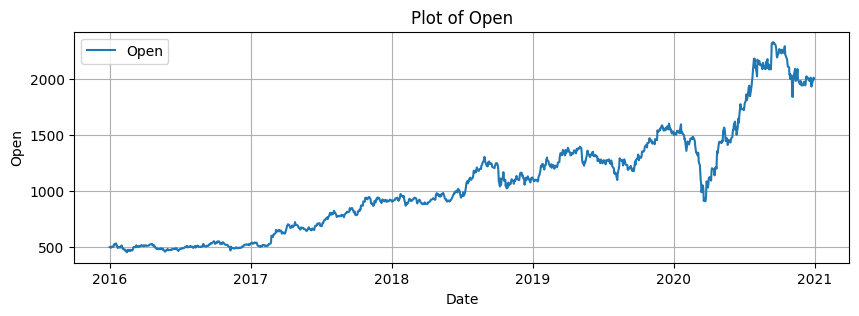

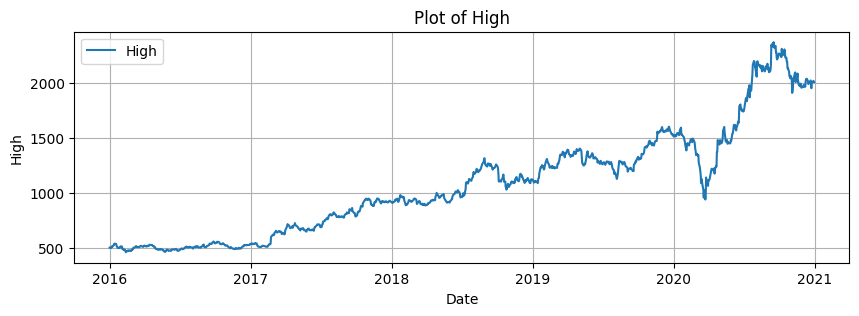

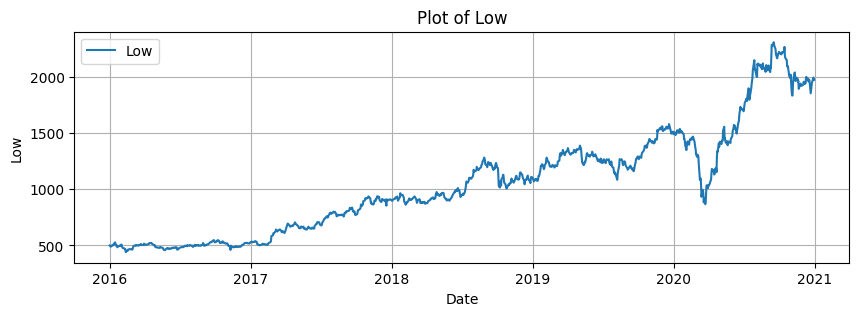

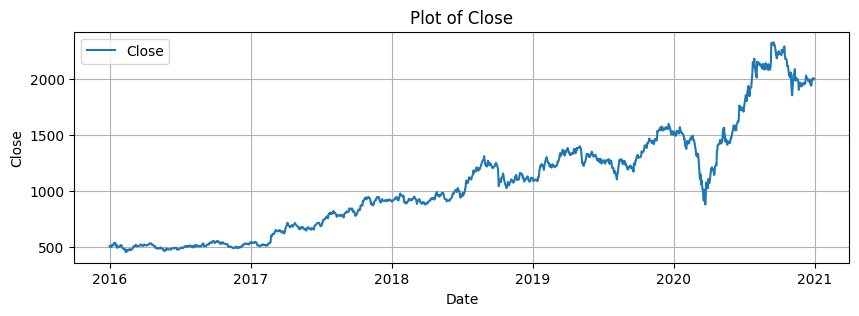

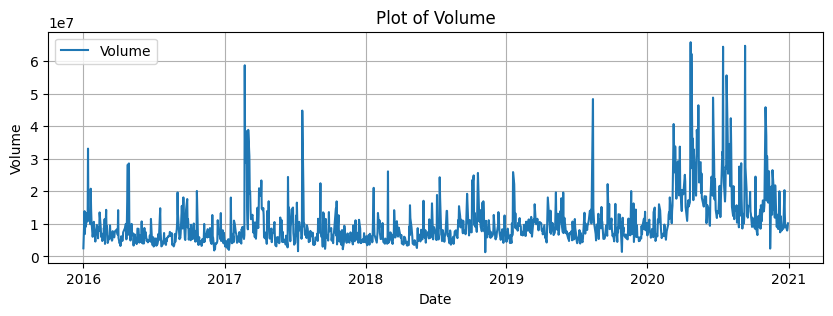

In [ ]:
# Plot each column separately
for column in df.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df[column], linestyle='-', label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Plot of {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

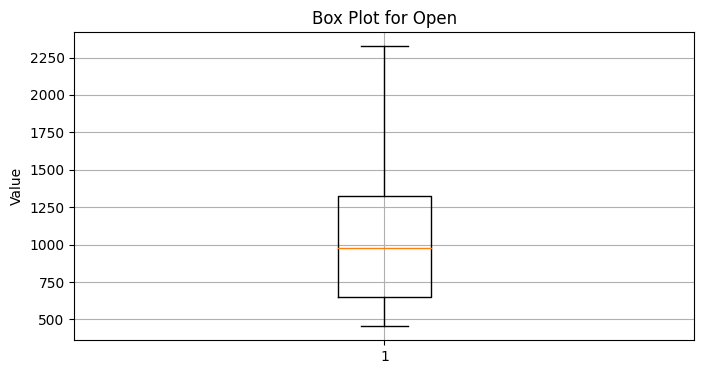

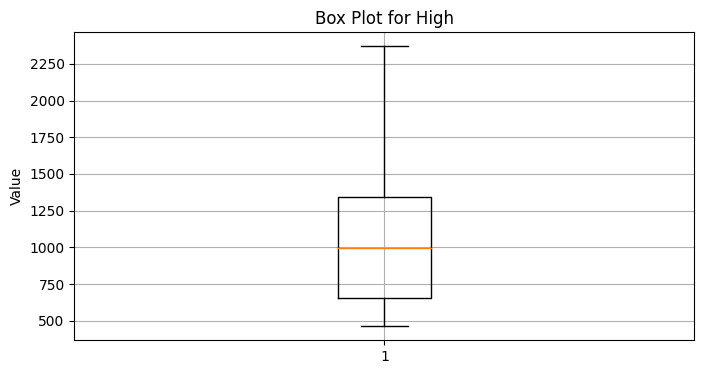

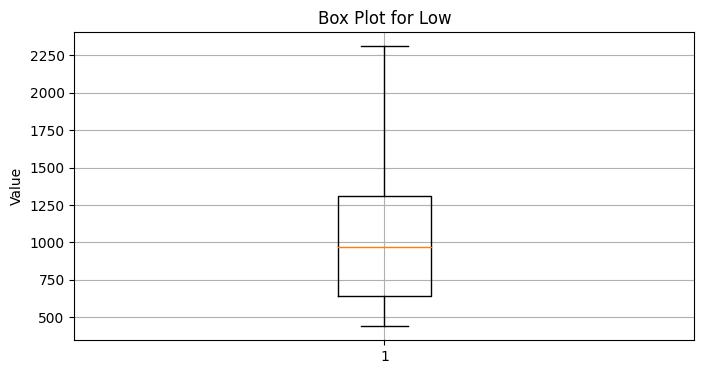

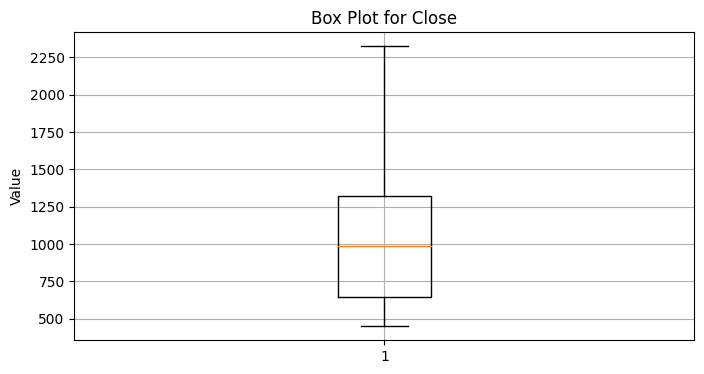

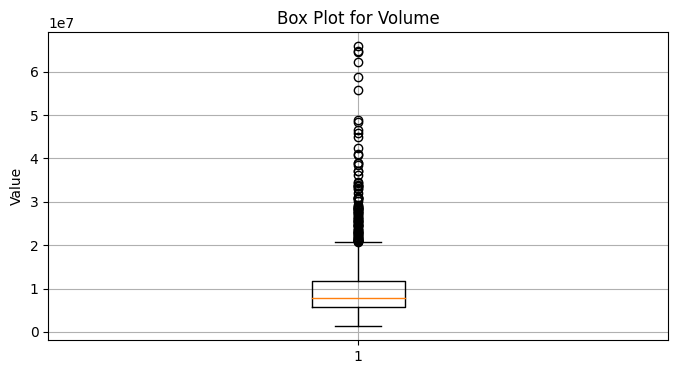

In [ ]:
# Plot each column separately to check for outliers
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [ ]:
def replace_outliers_with_avg(data, threshold=3):
    df = pd.DataFrame(data)
    z_scores = np.abs((df - df.mean()) / df.std())

    for column in df.columns:
        outlier_indices = z_scores[z_scores[column] > threshold].index
        for idx in outlier_indices:
            non_outlier_indices = z_scores[z_scores[column] <= threshold].index
            previous_non_outliers = non_outlier_indices[non_outlier_indices < idx]
            if len(previous_non_outliers) > 0:
                avg_non_outlier = df.loc[previous_non_outliers, column].mean()
                df.loc[idx, column] = avg_non_outlier

    return df

In [ ]:
for i in df.columns:
  df[i] = replace_outliers_with_avg(df[i])

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,1065.132384,1077.712709,1051.621460,1064.063544,9.426238e+06
std,477.644142,483.611917,469.720672,476.075858,5.531408e+06
min,454.690000,462.570000,439.880000,449.020000,1.296168e+06
25%,648.850000,657.270000,642.140000,646.550000,5.678473e+06
50%,980.510000,996.550000,967.530000,986.700000,7.771680e+06
75%,1325.390000,1344.750000,1309.590000,1324.300000,1.133325e+07
max,2325.000000,2369.350000,2310.550000,2324.550000,3.313678e+07


In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Open[float64],Mean (sd) : 1065.1 (477.6)min < med < max:454.7 < 980.5 < 2325.0IQR (CV) : 676.5 (2.2),"1,121 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3cPY7aQBiA4W/CsjIg2eJH0HGBlVIg0XCAlDlsjpCCIjU3oENCyAhnLYwhVVaKQgKe8aznY9+n3jEUr8x4PTPmcrkIELpPTX8B4B5Pt/7AGNMRkWfL6x8vl8ur5VjgzX9DNcZ0hsPh1ziO+zYX3+/3O2PMN2KFq1t31Oc4jvuLxeI1SZK8yoXTNI2Wy2V/u90+iwihwsnNn34RkSRJ8vF4/NPi+h2LMcBfeJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoV7tqK0pQmd8Cy+zYswYba5A5Ydt+GJ9hQpdkdsOy+DUzIoYpIsztg2X0bDh6moAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKwb/rt1WWZVtEYmOMzfD4fD63a/5KcPCQoWZZ1i6K4vN0Om21Wq1Kq59ERIqiiMqyfMnz/LuI2CxKQc28htrUXe14PD5FUdSdzWb5ZDLZVR2/Xq/7q9WqezqdWjafj/p5CzWEu1qv17Naprfb7VimFxhvoXJXQ528z1E/4l3NccrDfqsrHvJhqkmuUx72W11HqDVzmfKw3+rfCNUT2ymPsN/qKt5MQQVChQqEChUIFSoQKlQgVKjAv6fwxvEEQxGPb9UIFSLifoKhiN+3aoSK36xPMBTx/1aNUPEHhxMMRTy+VeNhCioQKlQgVKjAHBW18blgnFBRC98LxgkVtfC9YJxQH4zD26VaDt3wtWCcUAPjOM+LBoPBlyRJelUHhn7oBqEGpI6zEETkZT6f/xiNRvsqY0Pfnk6oAanrLIQoioqqP7+hb08n1AB9xLMQbrkr1DRNo6oXPhwOkYhIlmXRZrPpvud4rZ+t9Xu7jr+nr1/NOK6Rlu4UNgAAAABJRU5ErkJggg=="">",0(0.0%)
2,High[float64],Mean (sd) : 1077.7 (483.6)min < med < max:462.6 < 996.5 < 2369.3IQR (CV) : 687.5 (2.2),"1,163 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkUlEQVR4nO3cT27aQBSA8TclRAYkWwgJdlygUhcsOUQP2yN0wQm4ATskZBnhxsIYd5VIVUnBM556nvl+69hB0acM/jPP1HUtQOi+dP0BgEe83PsBY8xIRF4tz3+u6/rN8ljgwz9DNcaMZrPZ9ziOpzYnPx6PqTHmB7HC1b3/qK9xHE/X6/VbkiRFkxNnWRZtNpvp4XB4FRFChZO7S7+ISJIkxXw+/2Vx/pHFMcBfuJiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUeGhzX1e6nCnAPIOwBBtqlzMFmGcQnmBDlW5nCjDPIDAhhyoi3c4UYJ5BOLiYggqEChUIFSoQKlQgVKhAqFCBUKECoUKF4G/426qqaigisTHG5vD4er0OW/5IcNDLUPM8H5Zl+W25XA4Gg0GjR6AiImVZRlVVfS2K4qeI2DyZQst6Ger5fH6Jomi8Wq2KxWKRNj1+t9tNt9vt+HK5DHx8PjTnNdSul9/JZGL1rD5NU57VB8ZbqCy/aJO3UJ95+XVcSXjp+gbv31Gfbfl1XUl46fq2Xl5MdcllJeGl688Rqie2K4nw0vVNPJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVu+OOD42A4EY/vKRAqRMR9MJyI3/cUCBXvrAfDifh/T4FQ8QeHwXAiHt9T4GIKKhAqVCBUqMB3VLTG5xYcQu0Zh3uhTrt+fW/BIdQecbkX6rrr1/cWHELtF+t7oW3t+vW1BYdQA9PG0I4kSdKmsYS+65dQA8LQjs8RakCeeWjHPQ+FmmVZ1PTEp9MpEhHJ8zza7/fj/3m81t/9fqwrbX+zR/r6DVsJrv8HaqbgAAAAAElFTkSuQmCC"">",0(0.0%)
3,Low[float64],Mean (sd) : 1051.6 (469.7)min < med < max:439.9 < 967.5 < 2310.6IQR (CV) : 667.4 (2.2),"1,159 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmElEQVR4nO3cT46iQBSA8VdDq/gnEGOiOy8wySxccog57ByhF57AG7gzMQYj3UREZjWdTMYZhaKGevb3WzfI4osNFq9MVVUC+O5L1xcAPOLl3h8YY4Yi0m94/nNVVe8NjwU+/DNUY8xwNpt9j6Jo2uTkx+PxYIz5Qaywde8btR9F0TRJkvc4jvM6J07TNFyv19P9ft8XEUKFlbv/+kVE4jjO5/P5W4PzDxscA/yBhymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjw0Bv+XelysJChRr94G2qXg4UMNfrH21Cl28FChho943OoItLtYCFDjf7gYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMH7l1KaKsuyJyKRMabJ4dH1eu21fEmw4DTUrmLJsqxXFMW35XIZBEFQ6zU9EZGiKMKyLL/mef4qIk3enkLLnIXaZSzn8/klDMPRarXKF4vFoe5nb7fb6WazGV0ul6DusXDDWag+xDIejxu9T3o4HHif1DPO71E/YyyWtzzMW93wtA9TXbG95WHe6jZCbZnNLQ/zVn9HqI40veUR5q1u4gd/qECoUIFQoQKhQgVChQqEChX4eQofLHcwFHG4qkaoEBH7HQxF3K6qESp+abyDoYj7VTVCxW8sdjAUcbiqxsMUVCBUqECoUIFQoQKhQgWe+tEalyM4hPpkLFaXrPYycD2CQ6hPxGZ1yXYvA9cjOITqGdtNOyaTyTxJkmPd1aW29jJwNYJDqB5pa9OOwWDwWjcW38fTCdUjPmza4StC9dBn3LTjnodCTdM0rHvi0+kUiohkWRbudrvR/zxe62drvW7b4x/p6yeVP7TH92YrYwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Close[float64],Mean (sd) : 1064.1 (476.1)min < med < max:449.0 < 986.7 < 2324.6IQR (CV) : 677.8 (2.2),"1,200 distinct values","<img src = ""data:i

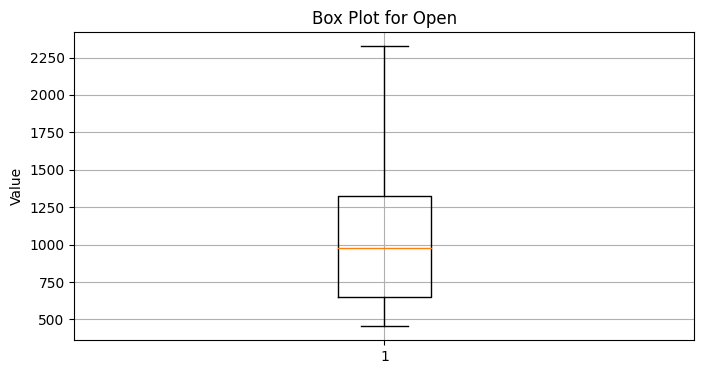

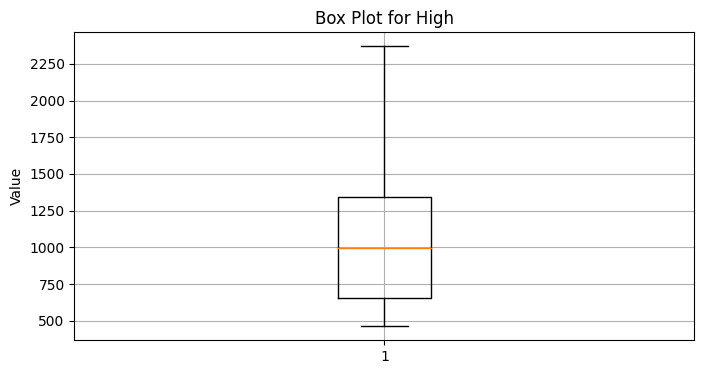

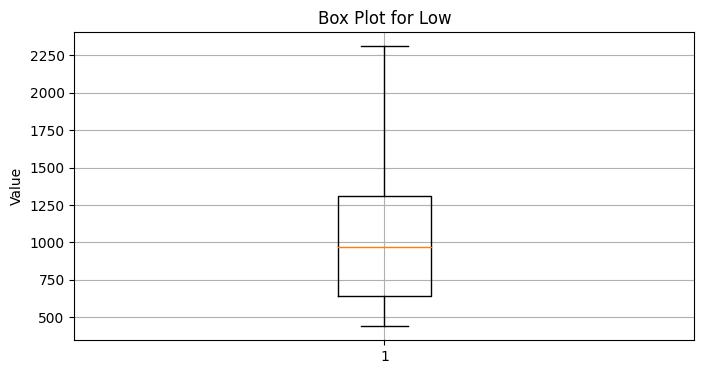

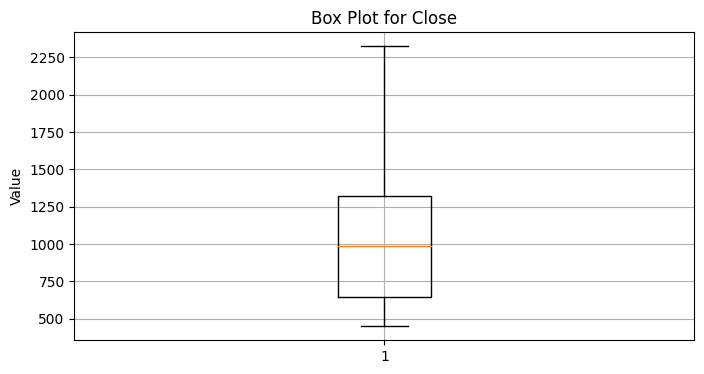

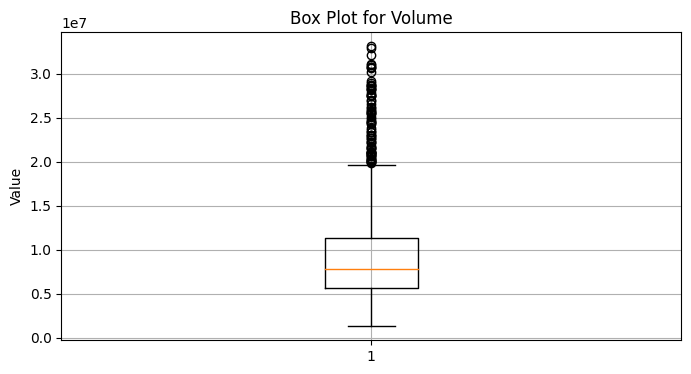

In [ ]:
# Plot each column separately post outlier treatment
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the first graph to the figure
fig.add_trace(go.Scatter(x=data.index, y=data['Volume'], mode='lines', name='Volume_Raw', line=dict(color='blue')))

# Add the second graph to the figure
fig.add_trace(go.Scatter(x=df.index, y=df['Volume'], mode='lines', name='Volume_processed', line=dict(color='red')))

# Update layout
fig.update_layout(
    title='Volume vs Volume processed',
    xaxis_title='x',
    yaxis_title='y',
    legend=dict(x=0.7, y=0.9),
)

# Show the plot
fig.show()

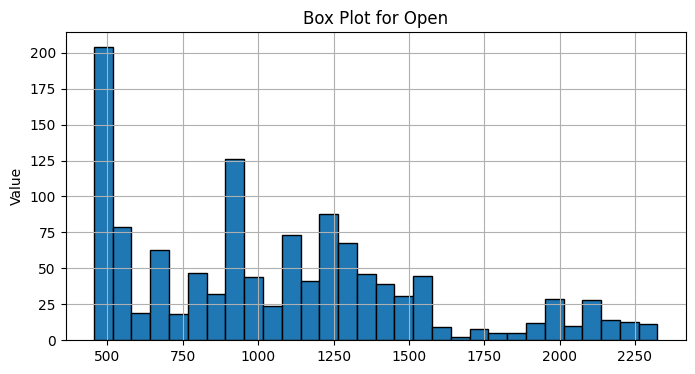

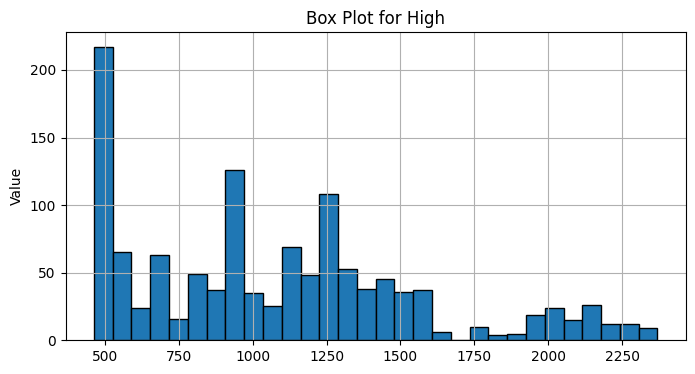

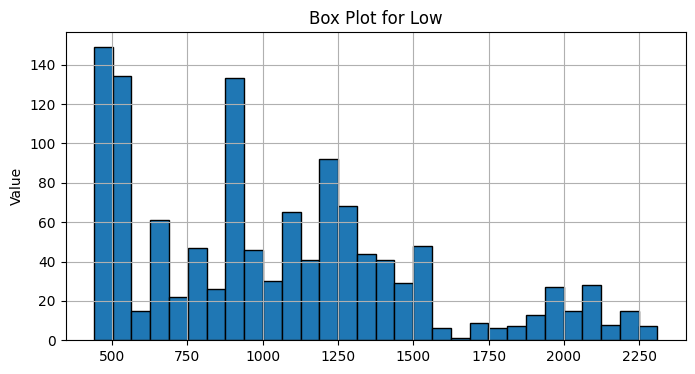

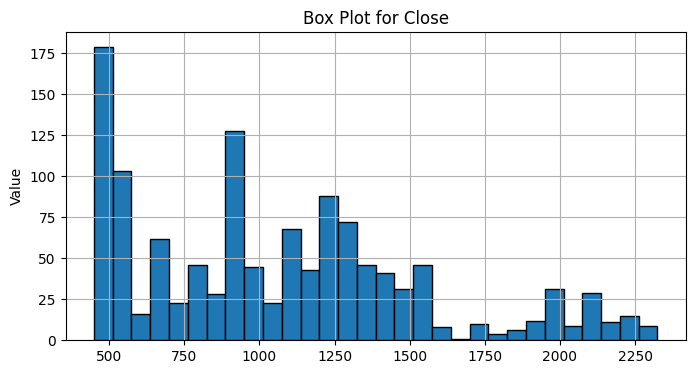

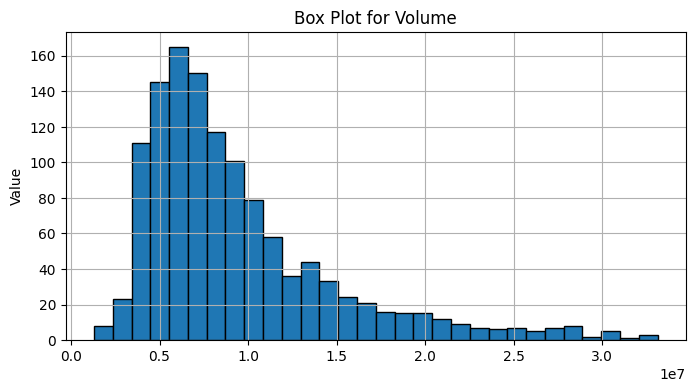

In [ ]:
# Plot each column separately
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [ ]:
# Seperating Target and predictor variables

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values

In [ ]:
print(X.shape)

(1233, 4)


In [ ]:
print(y.shape)

(1233,)


In [ ]:
# Split the data into training (2016-2019) and testing (2020) sets
train_start_date = '2016-01-01'
train_end_date = '2019-12-31'
test_start_date = '2020-01-01'
test_end_date = '2020-12-31'

In [ ]:
X_train = X[(df.index >= train_start_date) & (df.index <= train_end_date)]
X_test = X[(df.index >= test_start_date) & (df.index <= test_end_date)]
y_train = y[(df.index >= train_start_date) & (df.index <= train_end_date)]
y_test = y[(df.index >= test_start_date) & (df.index <= test_end_date)]

In [ ]:
print(X_train.shape)

(983, 4)


In [ ]:
print(X_test.shape)

(250, 4)


In [ ]:
print(y_train.shape)

(983,)


In [ ]:
print(y_test.shape)

(250,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Normalize the features (X_train and X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a scaler for the target variable y
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from pyswarm import pso

In [ ]:
# Define the fitness function for PSO
def fitness_function(params):
    C, gamma, epsilon = params
    svm_model = SVR(kernel='rbf', C=C, gamma=gamma, epsilon=epsilon)
    svm_model.fit(X_train_scaled, y_train_scaled.ravel())
    predictions_scaled = svm_model.predict(X_test_scaled).reshape(-1, 1)

    # Invert the scaling of predictions to get the original scale
    predictions = scaler_y.inverse_transform(predictions_scaled)

    mse = mean_squared_error(y_test, predictions)
    return mse

In [ ]:
# Define parameter ranges for PSO
param_ranges = [(1, 200), (0.01, 2), (1e-3, 1)]

In [ ]:
# PSO parameters
C1 = 1
C2 = 1

In [ ]:
lb = [param[0] for param in param_ranges]
ub = [param[1] for param in param_ranges]

In [ ]:
# Run PSO optimization
best_params, _ = pso(fitness_function, lb, ub, swarmsize=40, maxiter=400, debug=False, minstep=1e-13, minfunc=1e-13, phip=C1, phig=C2, omega=1.1)

Stopping search: maximum iterations reached --> 400


In [ ]:
# Extract the best hyperparameters
best_C, best_gamma, best_epsilon = best_params

In [ ]:
# Train the final SVM model with the best hyperparameters
final_svm_model = SVR(kernel='rbf', C=best_C, gamma=best_gamma, epsilon=best_epsilon)
final_svm_model.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=200.0, epsilon=0.001, gamma=0.08101621168605055)

In [ ]:
# Make predictions on the test set
predictions = final_svm_model.predict(X_test_scaled)

In [ ]:
# Make predictions on the test set
predictions_scaled = final_svm_model.predict(X_test_scaled).reshape(-1, 1)

In [ ]:
# Invert the scaling of predictions to get the original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

In [ ]:
# Calculate and print the MSE on the test set
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 335.4244567140414


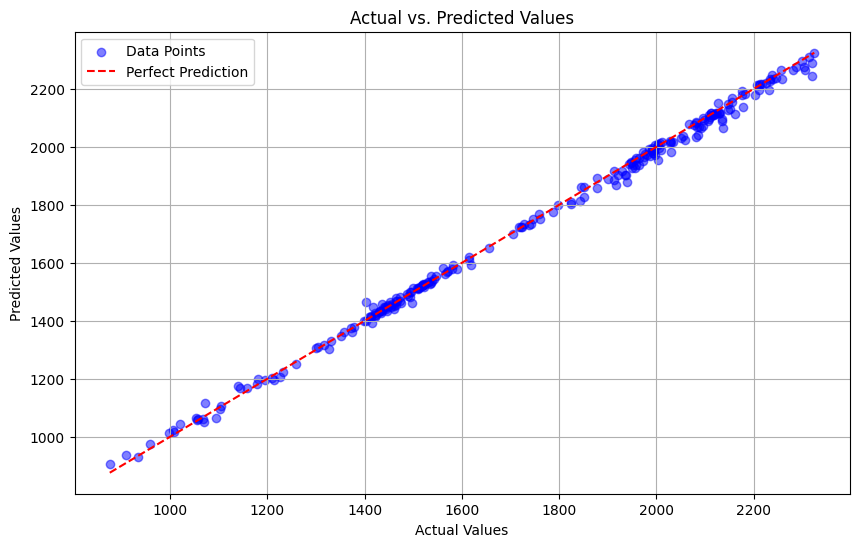

In [ ]:
# Visualize actual vs. predicted values with different colors and lines
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Data Points', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
svm_model=SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train_scaled.ravel())

SVR()

In [ ]:
predictions_scaled_svm = svm_model.predict(X_test_scaled).reshape(-1, 1)

In [ ]:
predictions_svm = scaler_y.inverse_transform(predictions_scaled_svm)

In [ ]:
mse1 = mean_squared_error(y_test, predictions_svm)
print(f"Mean Squared Error (MSE): {mse1}")

Mean Squared Error (MSE): 569252.0963663638


In [ ]:
import math
RMSE_SVM_PSO=math.sqrt(mse)
RMSE_SVM=math.sqrt(mse1)
print(RMSE_SVM_PSO,  RMSE_SVM )

18.314596820952445 754.4879696631112


In [ ]:
# percentage change in RMSE:
p=((-RMSE_SVM_PSO+RMSE_SVM)/RMSE_SVM)*100
p

97.57257934422331